In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/content/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
df.isnull().sum().max()

0

In [5]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
df['Class'].value_counts()[0]

284315

In [7]:
print("Percent of No Fraud rows", round(df['Class'].value_counts()[0]/len(df) * 100,2))
print("Percent of Fraud rows", round(df['Class'].value_counts()[1]/len(df) * 100,2))

Percent of No Fraud rows 99.83
Percent of Fraud rows 0.17


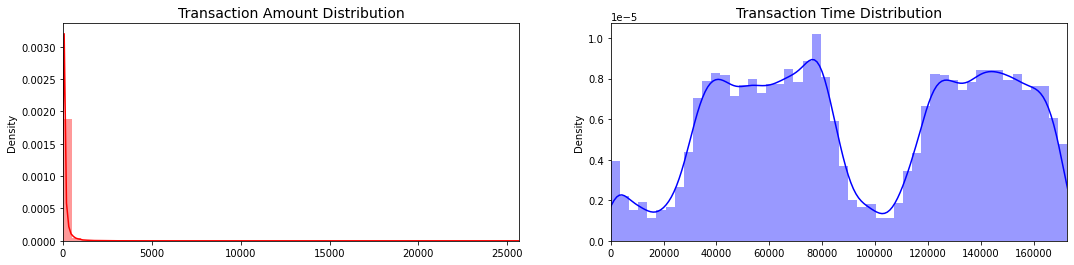

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_value = df['Amount'].values
time_value = df['Time'].values

sns.distplot(amount_value, ax=ax[0], color='r')
ax[0].set_title('Transaction Amount Distribution', fontsize=14)
ax[0].set_xlim([min(amount_value), max(amount_value)])


sns.distplot(time_value, ax=ax[1], color='b')
ax[1].set_title('Transaction Time Distribution', fontsize=14)
ax[1].set_xlim([min(time_value), max(time_value)])

plt.show()

We can see that the distributions of the features are skewed.

We now will scale these features.

In [9]:
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()

df['ScaledAmount'] = robust_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['ScaledTime'] = robust_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time', 'Amount'], axis=1, inplace=True)

In [10]:
scaled_amount = df['ScaledAmount']
scaled_time = df['ScaledTime']

df.drop(['ScaledAmount', 'ScaledTime'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


Text(0.5, 1.0, 'Imbalanced Correlation Matrix')

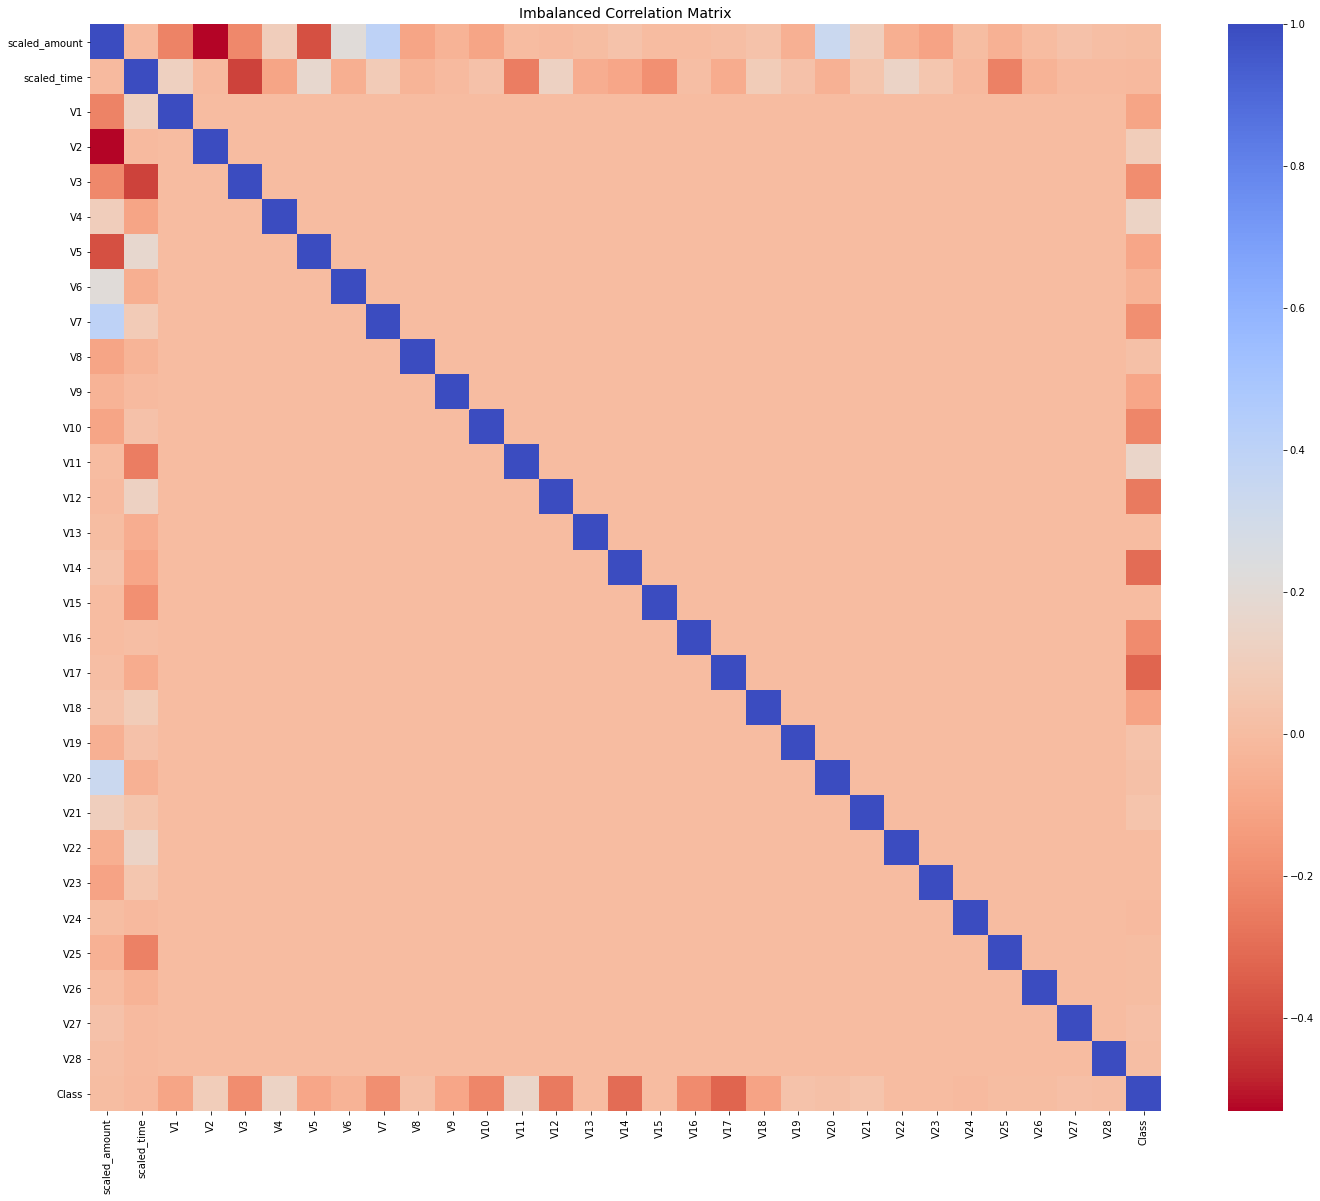

In [11]:
f, ax1 = plt.subplots(1,1,figsize=(24,20))

corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix", fontsize=14)

We take features that have a high correlation (positive or negative) with our Class label. 

Correlation matrix might be affected by high imbalance between our classes but we still go ahead and check for only "extreme" outliers in features V4, V11, V17, V14 since they show signs of correlation.

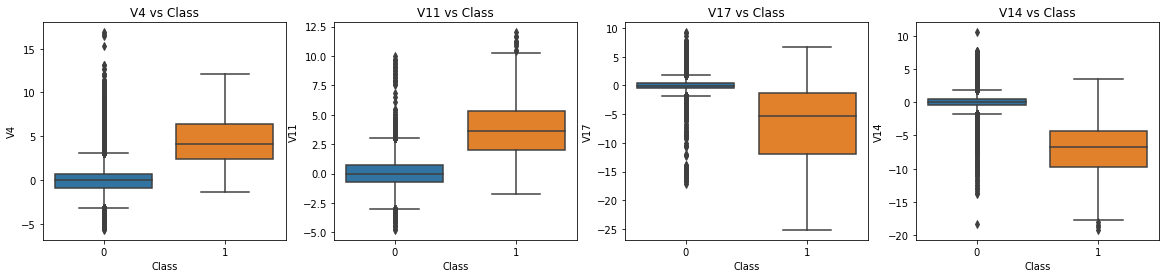

In [12]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x="Class", y="V4", data=df, ax=axes[0])
axes[0].set_title("V4 vs Class")

sns.boxplot(x="Class", y="V11", data=df, ax=axes[1])
axes[1].set_title("V11 vs Class")

sns.boxplot(x="Class", y="V17", data=df, ax=axes[2])
axes[2].set_title("V17 vs Class")

sns.boxplot(x="Class", y="V14", data=df, ax=axes[3])
axes[3].set_title("V14 vs Class")
plt.show()

Let's look at a few more and see if they have outliers for fraud labels. Let's take V12, V10 and V2



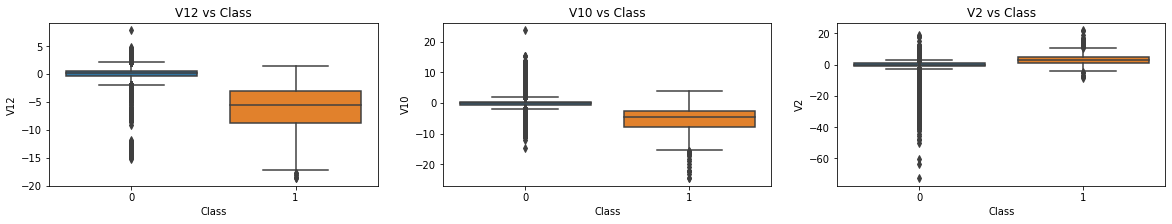

In [13]:
f, axes = plt.subplots(ncols=3, figsize=(20,3))

sns.boxplot(x="Class", y="V12", data=df, ax=axes[0])
axes[0].set_title("V12 vs Class")

sns.boxplot(x="Class", y="V10", data=df, ax=axes[1])
axes[1].set_title("V10 vs Class")

sns.boxplot(x="Class", y="V2", data=df, ax=axes[2])
axes[2].set_title("V2 vs Class")

plt.show()

In [14]:
len(df)

284807

In [16]:
v10_fraud = df['V10'].loc[df['Class']==1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cutoff = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cutoff, q75 + v10_cutoff
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
df = df.drop(df[(df['V10'] > v10_upper) | (df['V10'] < v10_lower)].index)
print("No of instances after outlier removal: {}".format(len(df)))
print('V10 outliers:{}'.format(outliers))

v12_fraud = df['V12'].loc[df['Class']==1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cutoff = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cutoff, q75 + v12_cutoff
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
df = df.drop(df[(df['V12'] > v12_upper) | (df['V12'] < v12_lower)].index)
print("No of instances after outlier removal: {}".format(len(df)))
print('V12 outliers:{}'.format(outliers))

v14_fraud = df['V14'].loc[df['Class']==1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
v14_iqr = q75 - q25

v14_cutoff = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cutoff, q75 + v14_cutoff
outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
df = df.drop(df[(df['V14'] > v14_upper) | (df['V14'] < v14_lower)].index)
print("No of instances after outlier removal: {}".format(len(df)))
print('V14 outliers:{}'.format(outliers))

No of instances after outlier removal: 283427
V10 outliers:[-16.6496281595399, -18.2711681738888, -15.563791338730098, -15.563791338730098, -16.7460441053944, -22.1870885620007, -22.1870885620007, -22.1870885620007, -22.1870885620007, -17.141513641289198, -16.3035376590131, -16.2556117491401, -16.6011969664137, -18.9132433348732, -20.949191554361104, -19.836148851696, -23.2282548357516, -24.403184969972802, -24.5882624372475]
No of instances after outlier removal: 283413
V12 outliers:[-17.7691434633638, -17.631606313870698, -17.2286622386187, -17.1313009454468, -18.047596570821604, -18.683714633344298, -18.553697009645802, -18.4311310279993, -17.1829184301947, -17.1829184301947, -17.003289445516, -17.003289445516, -17.1504052507291]
No of instances after outlier removal: 282980
V14 outliers:[-17.7216383537133, -17.4759212828566, -17.230202160711, -17.6206343516773, 3.4424219959421496]


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold, StratifiedKFold

X = df.drop('Class', axis=1)
y = df['Class']

skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in skf.split(X,y):
  print("Train:", train_index, "Test:", test_index)
  original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
  original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

unique_train_labels, counts_train_labels = np.unique(original_ytrain, return_counts=True)
unique_test_labels, counts_test_labels = np.unique(original_ytest, return_counts=True)

print("\nLabel Distributions: \n")
print(counts_train_labels/len(original_ytrain))
print(counts_test_labels/len(original_ytest))

Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]

Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


Over Sampling using SMOTE.
SMOTE creates synthetic data points to obtain a balance in the data since non fraud rows are a lot more in it.

SMOTE occurs during cross validation. Synthetic data are created only for the training set without affecting validation set.

In [13]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

print("Length of X train: {} | Length of y train: {}".format(len(original_Xtrain), len(original_ytrain)))
print("Length of X test: {} | Length of y test: {}\n".format(len(original_Xtest), len(original_ytest)))

accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
auc_list = []

logistic_reg = LogisticRegression()
logistic_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'solver':['liblinear']}
random_logistic_reg = RandomizedSearchCV(LogisticRegression(), logistic_reg_params, n_iter=4)

for train, test in skf.split(original_Xtrain, original_ytrain):
  pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), random_logistic_reg)
  #This is imbalanced. SMOTE will happen during Cross Validation
  model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
  best_estim = random_logistic_reg.best_estimator_
  prediction = best_estim.predict(original_Xtrain[test])

  accuracy_list.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
  precision_list.append(precision_score(original_ytrain[test], prediction))
  recall_list.append(recall_score(original_ytrain[test], prediction))
  f1_list.append(f1_score(original_ytrain[test], prediction))
  auc_list.append(roc_auc_score(original_ytrain[test], prediction))

print("accuracy: {}".format(np.mean(accuracy_list)))
print("precision: {}".format(np.mean(precision_list)))
print("recall: {}".format(np.mean(recall_list)))
print("f1: {}".format(np.mean(f1_list)))

Length of X train: 227846 | Length of y train: 227846
Length of X test: 56961 | Length of y test: 56961

accuracy: 0.9427426844319017
precision: 0.06203461663749733
recall: 0.9162934112301201
f1: 0.11436550064227535


In [14]:
labels = ['No Fraud', 'Fraud']
smote_prediction = best_estim.predict(original_Xtest)
print(classification_report(original_ytest, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

    No Fraud       1.00      0.99      0.99     56863
       Fraud       0.11      0.86      0.20        98

    accuracy                           0.99     56961
   macro avg       0.56      0.92      0.60     56961
weighted avg       1.00      0.99      0.99     56961



In [15]:
from sklearn.metrics import average_precision_score

y_score = best_estim.decision_function(original_Xtest)
avg_precision = average_precision_score(original_ytest, y_score)

print("Average PR score: {0:0.2f}".format(avg_precision))

Average PR score: 0.75


Text(0.5, 1.0, 'SMOTE PR curve: \n Average PR score=0.75')

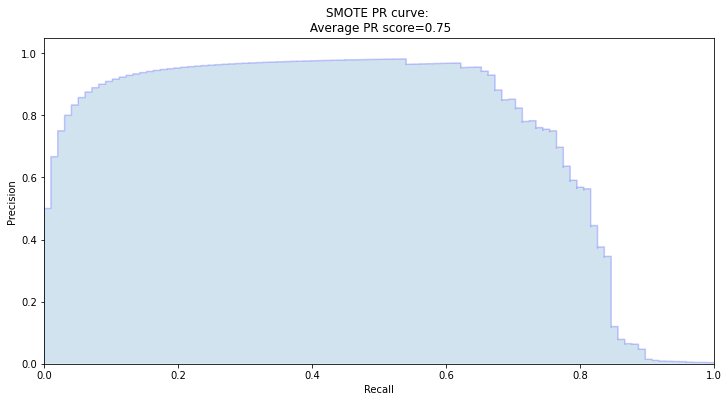

In [16]:
from sklearn.metrics import precision_recall_curve

fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, y_score)
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('SMOTE PR curve: \n Average PR score={0:0.2f}'.format(avg_precision))

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [18]:
smote = SMOTE(ratio='minority', random_state=42)
Xsmote_train, ysmote_train = smote.fit_sample(original_Xtrain, original_ytrain)
logistic_reg.fit(Xsmote_train, ysmote_train)
y_pred_logistic_reg = logistic_reg.predict(X_test)
print(classification_report(y_test, y_pred_logistic_reg))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.08      0.93      0.14        98

    accuracy                           0.98     56962
   macro avg       0.54      0.95      0.57     56962
weighted avg       1.00      0.98      0.99     56962



In [19]:
from sklearn.metrics import accuracy_score

y_predict_smote = best_estim.predict(original_Xtest)
oversample_score = accuracy_score(original_ytest, y_predict_smote)
print("SMOTE score: {0:0.3f}".format(oversample_score))

SMOTE score: 0.988


In [20]:
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
n_inputs = Xsmote_train.shape[1]

model = Sequential([
                    Dense(n_inputs, input_shape=(n_inputs, ),activation='relu'),
                    Dense(32, activation='relu'),
                    Dense(2, activation='softmax')
])

model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(Xsmote_train, ysmote_train, validation_split=0.2, batch_size=300,
          epochs=20, shuffle=True, verbose=2)

Epoch 1/20
1214/1214 - 3s - loss: 0.0607 - accuracy: 0.9794 - val_loss: 0.0305 - val_accuracy: 0.9916
Epoch 2/20
1214/1214 - 2s - loss: 0.0126 - accuracy: 0.9971 - val_loss: 0.0078 - val_accuracy: 0.9997
Epoch 3/20
1214/1214 - 2s - loss: 0.0067 - accuracy: 0.9986 - val_loss: 0.0038 - val_accuracy: 0.9999
Epoch 4/20
1214/1214 - 2s - loss: 0.0048 - accuracy: 0.9990 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 5/20
1214/1214 - 2s - loss: 0.0036 - accuracy: 0.9993 - val_loss: 0.0034 - val_accuracy: 0.9996
Epoch 6/20
1214/1214 - 2s - loss: 0.0030 - accuracy: 0.9994 - val_loss: 0.0037 - val_accuracy: 0.9999
Epoch 7/20
1214/1214 - 2s - loss: 0.0024 - accuracy: 0.9995 - val_loss: 7.2775e-04 - val_accuracy: 1.0000
Epoch 8/20
1214/1214 - 2s - loss: 0.0021 - accuracy: 0.9996 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 9/20
1214/1214 - 2s - loss: 0.0019 - accuracy: 0.9996 - val_loss: 0.0019 - val_accuracy: 0.9996
Epoch 10/20
1214/1214 - 2s - loss: 0.0021 - accuracy: 0.9995 - val_loss: 3.217

In [21]:
predictions = model.predict(original_Xtest, batch_size=200, verbose=0)
fraud_predictions = model.predict_classes(original_Xtest, batch_size=200, verbose=0)

In [22]:
from sklearn.metrics import confusion_matrix

smote_cm = confusion_matrix(original_ytest, fraud_predictions)
actual_cm = confusion_matrix(original_ytest, original_ytest)
labels = ['No Fraud', 'Fraud']

print("SMOTE confusion matrix:\n",smote_cm,"\n\nActual confusion matrix:\n", actual_cm)

SMOTE confusion matrix:
 [[56848    15]
 [   31    67]] 

Actual confusion matrix:
 [[56863     0]
 [    0    98]]


SMOTE confusion matrix after outlier removal:
 [[56491    14] 
 [   27    64]] 

Actual confusion matrix:
 [[56505     0]
 [    0    91]]

Results may vary based on random states.
In this case, my results without outlier removal were better than with outlier removal.